# Rotating Line and Parabola

In [1]:
# --------IMPORTING LIBRARIES--------

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML


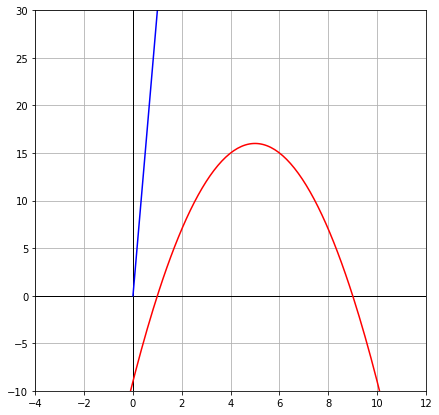

In [2]:
# --------FORMATTING THE DISPLAY--------

# Setting the size of the display window
fig = plt.figure(figsize = (7, 7))
# Setting the axes sizes
plt.xlim((-4, 12))
plt.ylim((-10, 30))
# Setting the axes markers 
plt.xticks([-4, -2, 0, 2, 4, 6, 8, 10, 12])
plt.yticks([-10, -5, 0, 5, 10, 15, 20, 25, 30])
# Plot axes lines
plt.axhline(0, color = 'black', lw =1)
plt.axvline(0, color = 'black', lw = 1)
# Plot grid lines
plt.grid()

# --------PLOTTING POINTS AND FUNCTIONS--------

# Define and plot parabola 
def parabola(x):
    y = -(x-1)*(x-9)
    return y
X = np.linspace(-4, 12, 200)

plt.plot(X, parabola(X), 'r-')


# --------CREATE ANIMATION OBJECTS--------
def f(x): 
    y = 30*x
    return y
X1 = np.linspace(0, 12, 100)
line, = plt.plot(X1, f(X1), 'b-')

# There are no intersections initally so we will plot empty lists of coordinates
points, = plt.plot([], [], 'ko')


#### How do we animate the points and lines?
To animate the line, the slope will decrease each frame. Therefore, we will write the slope as a function of i then use that in our equation of the line.

To animate the points we need to think back to the discriminant analysis we made for the number of intersections. We saw that for there to be an intersection D must be greater than or equal to zero. Therefore, we will only animate the points if D >= 0. 

In [3]:
# --------ANIMATION FUNCTION--------

# Total time
T = 10
# Change in slope (m) every frame
deltaM = 0.05
# Initial slope (m)
m0 = 10
# Final slope (m)
mN = 0
# Number of frames and time interval calculated from information you gave above
N = abs(int(((mN - m0)/deltaM) + 1))
deltaT = T*1000/N

# This animate function will create each frame in our stop-motion animation. The parameter i is the frame number. 
def animate(i):
    
    # The slope as a function of i
    slope = (m0 - deltaM*i)
    
    # Updating the line
    def g(x):
        y = slope*x
        return y
    X = np.linspace(0, 12, 100)
    
    line.set_data(X, g(X))
    
    # Updating the points if D is greater than or equal to zero
    if ((10 - slope)**2 - 36) >= 0:
        x1 = (10 - slope + np.sqrt((10 - slope)**2 - 36))/2
        x2 = (10 - slope - np.sqrt((10 - slope)**2 - 36))/2
        y1 = -x1**2 + 10*x1 - 9
        y2 = -x2**2 + 10*x2 - 9
        
        points.set_data([x1, x2], [y1, y2])
    
    return line, points

anim = animation.FuncAnimation(fig, animate, frames=N, interval = deltaT, repeat = False)
HTML(anim.to_html5_video())
